In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [13]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [14]:
w = np.arange(0,1,0.1)
w[-1]

0.9

# Question:

If we change the SSH from 9.8 cm to 6.6, how does that affect through-fluxes?

In [58]:
BR_2016_1_nc = nc.Dataset('./massbal_to_nc/MASSBAL_BR_2016_1_fullyear.nc')
PI_2016_1_nc = nc.Dataset('./massbal_to_nc/MASSBAL_SSH_2016_1_fullyear.nc')


In [59]:
import numpy as np
w = np.random.rand(365,898,398)
w2 = np.mean(w, axis = 1)
w3 = np.mean(w2, axis = 1)
print(np.shape(w3))

(365,)


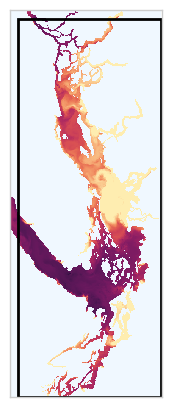

In [60]:
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_carp_T.nc')
surfdat_1 = t_nc.variables['dissolved_inorganic_carbon'][0,0,:,:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
cmap = cm.cm.matter
tplt = np.ma.masked_values(surfdat_1[:,:],0)
v_min = 2000
v_max = 2000

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=1800, vmax=2200)

# ax.set_xlabel('x Index', fontsize = 20 )
# ax.set_ylabel('y Index', fontsize = 20 )

pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(pat)

plt.xticks([])
plt.yticks([])
#plt.xticks(fontsize=8)
#plt.yticks(fontsize=8)
cmap.set_bad('aliceblue')
#plt.suptitle('domain for calculation',fontsize=20)


In [18]:
stor_mol_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol']
stor_mol_surf_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_surf']
stor_mol_20_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_20']
stor_mol_20_100_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_20_100']
stor_mol_deep_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_deep']
stor_flx_BR_16_1 = BR_2016_1_nc['model_output']['stor_flx']
stor_trans_JDF_BR_16_1 = BR_2016_1_nc['model_output']['stor_trans_JDF']
stor_trans_JS_BR_16_1 = BR_2016_1_nc['model_output']['stor_trans_JS']

stor_mol_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol']
stor_mol_surf_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol_deep']
stor_flx_PI_16_1 = PI_2016_1_nc['model_output']['stor_flx']
stor_trans_JDF_PI_16_1 = PI_2016_1_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_16_1 = PI_2016_1_nc['model_output']['stor_trans_JS']
days_in = np.arange(0,np.size(stor_mol_PI_15_1),1)

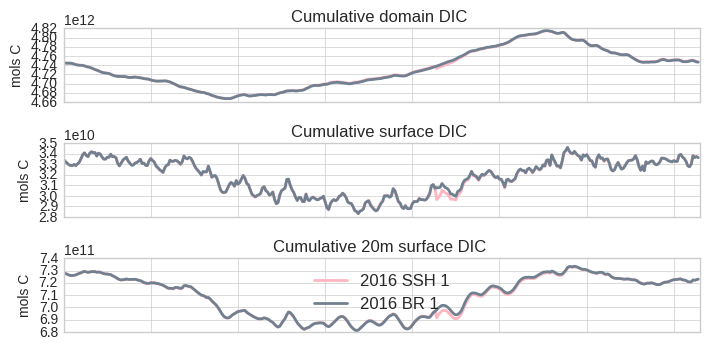

In [62]:
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,stor_mol_PI_16_1[0:365],color = 'lightpink',label = '2016 SSH 1', linewidth = 2)
ax.plot(days_in,stor_mol_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
plt.xlim([0,365])
#ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_mol_surf_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)
ax.plot(days_in,stor_mol_surf_BR_16_1[0:365],color = 'slategrey',label = '2016 SSH 1', linewidth = 2)

#ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Cumulative surface DIC ')

ax = fig.add_subplot(3,1,3)
ax.plot(days_in,stor_mol_20_PI_16_1[0:365],color = 'lightpink',label = '2016 SSH 1', linewidth = 2)
ax.plot(days_in,stor_mol_20_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.legend(loc = 'best')
ax.set_ylabel('mols C')
plt.xlim([0,365])
ax.set_xticklabels([])
plt.title('Cumulative 20m surface DIC ')
 

plt.tight_layout()


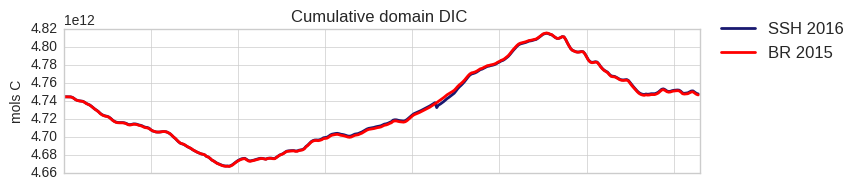

In [63]:
# 0.16098397583284463
# 0.21739349
# d_int
# 0.4354064241603956
# 0.4805894
# d_deep
# 0.403609600006759
# 0.30201733

vol_surf = np.zeros_like(stor_mol_BR_15_2)
vol_surf[:] = .161
vol_int = np.copy(vol_surf)
vol_int[:] = .435
vol_deep = np.copy(vol_surf)
vol_deep[:] = .404
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(2,1,1)
ax.plot(days_in,stor_mol_PI_16_1[0:365],color = 'midnightblue',label = 'SSH 2016', linewidth = 2)
ax.plot(days_in,stor_mol_BR_16_1[0:365],color = 'red',label = 'BR 2015', linewidth = 2)
plt.xlim([0,365])
ax.legend(loc = 'best', bbox_to_anchor=[1.01, 1.15])
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')


plt.tight_layout()


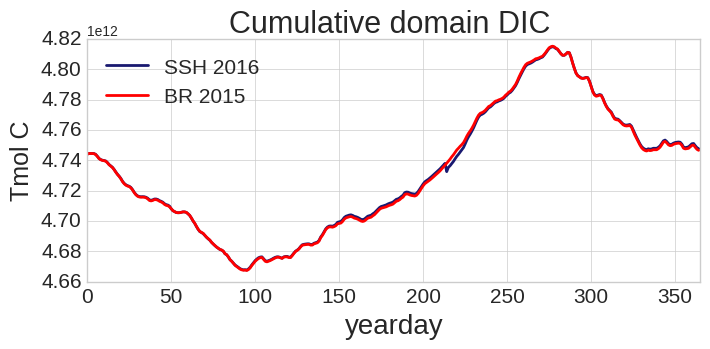

In [64]:
# 0.16098397583284463
# 0.21739349
# d_int
# 0.4354064241603956
# 0.4805894
# d_deep
# 0.403609600006759
# 0.30201733

vol_surf = np.zeros_like(stor_mol_BR_15_2)
vol_surf[:] = .161
vol_int = np.copy(vol_surf)
vol_int[:] = .435
vol_deep = np.copy(vol_surf)
vol_deep[:] = .404
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(1,1,1)
ax.plot(days_in,stor_mol_PI_16_1[0:365],color = 'midnightblue',label = 'SSH 2016', linewidth = 2)
ax.plot(days_in,stor_mol_BR_16_1[0:365],color = 'red',label = 'BR 2015', linewidth = 2)

plt.xlim([0,365])
ax.legend(loc = 'best', fontsize = 15)
#ax.legend(loc = 'best', bbox_to_anchor=[1.01, 1.15])
#ax.set_xticklabels([])
ax.set_ylabel('Tmol C', fontsize = 18)
plt.title('Cumulative domain DIC ', fontsize = 22)
plt.xlim([0,365])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel('yearday', fontsize = 20)

plt.tight_layout()


In [26]:
t_mask = grid['tmask']
print(t_mask[0,0,250,250])

1


In [27]:
wdir_deep_0 = grid['e3t_0'][0,27:40,0,0]
print(wdir_deep_0)

[24.640731976147656 25.70331479283053 26.286849834306253 26.59728864969258
 26.75965336190128 26.843817035596075 26.88724213290768 26.909594066407376
 26.92108493428825 26.926988503279443 26.930020541517454 26.93157751738656
 26.932376968096264]


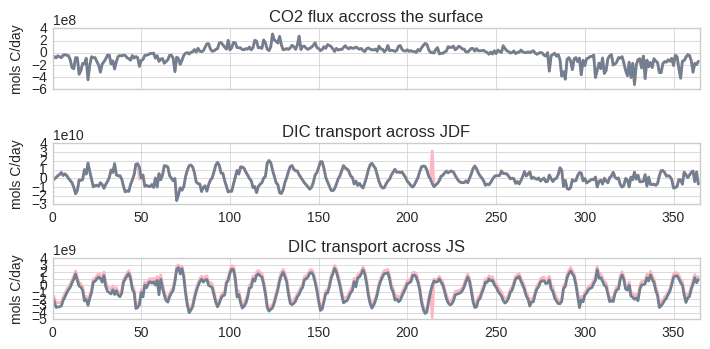

In [65]:
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,stor_flx_PI_16_1[0:365],color = 'lightpink',label = '2016 SSH 1', linewidth = 2)

ax.plot(days_in,stor_flx_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_trans_JDF_PI_16_1[0:365],color = 'lightpink',label = '2016 SSH 1', linewidth = 2)
ax.plot(days_in,stor_trans_JDF_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(3,1,3)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.plot(days_in,stor_trans_JS_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)
ax.plot(days_in,stor_trans_JS_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JS')
plt.tight_layout()

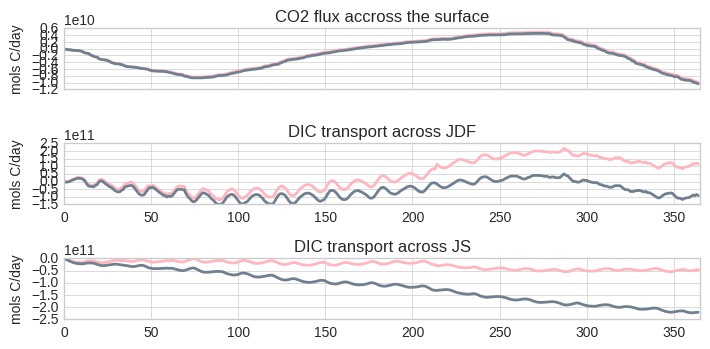

In [75]:
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,np.cumsum(stor_flx_PI_16_1[0:365]),color = 'lightpink',label = '2016 SSH 1', linewidth = 2)

ax.plot(days_in,np.cumsum(stor_flx_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 1', linewidth = 2)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,np.cumsum(stor_trans_JDF_PI_16_1[0:365]),color = 'lightpink',label = '2016 SSH 1', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JDF_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 1', linewidth = 2)
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(3,1,3)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.plot(days_in,np.cumsum(stor_trans_JS_PI_16_1[0:365]),color = 'lightpink',label = '2016 PI 1', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JS_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JS')
plt.tight_layout()

In [66]:
print('2016 SSH outgassing days', 366-np.size(np.where(stor_flx_PI_16_1[:] >0)))
print('2016 BR outgassing days', 366-np.size(np.where(stor_flx_BR_16_1[:] >0)))


2016 SSH outgassing days 177
2016 BR outgassing days 178


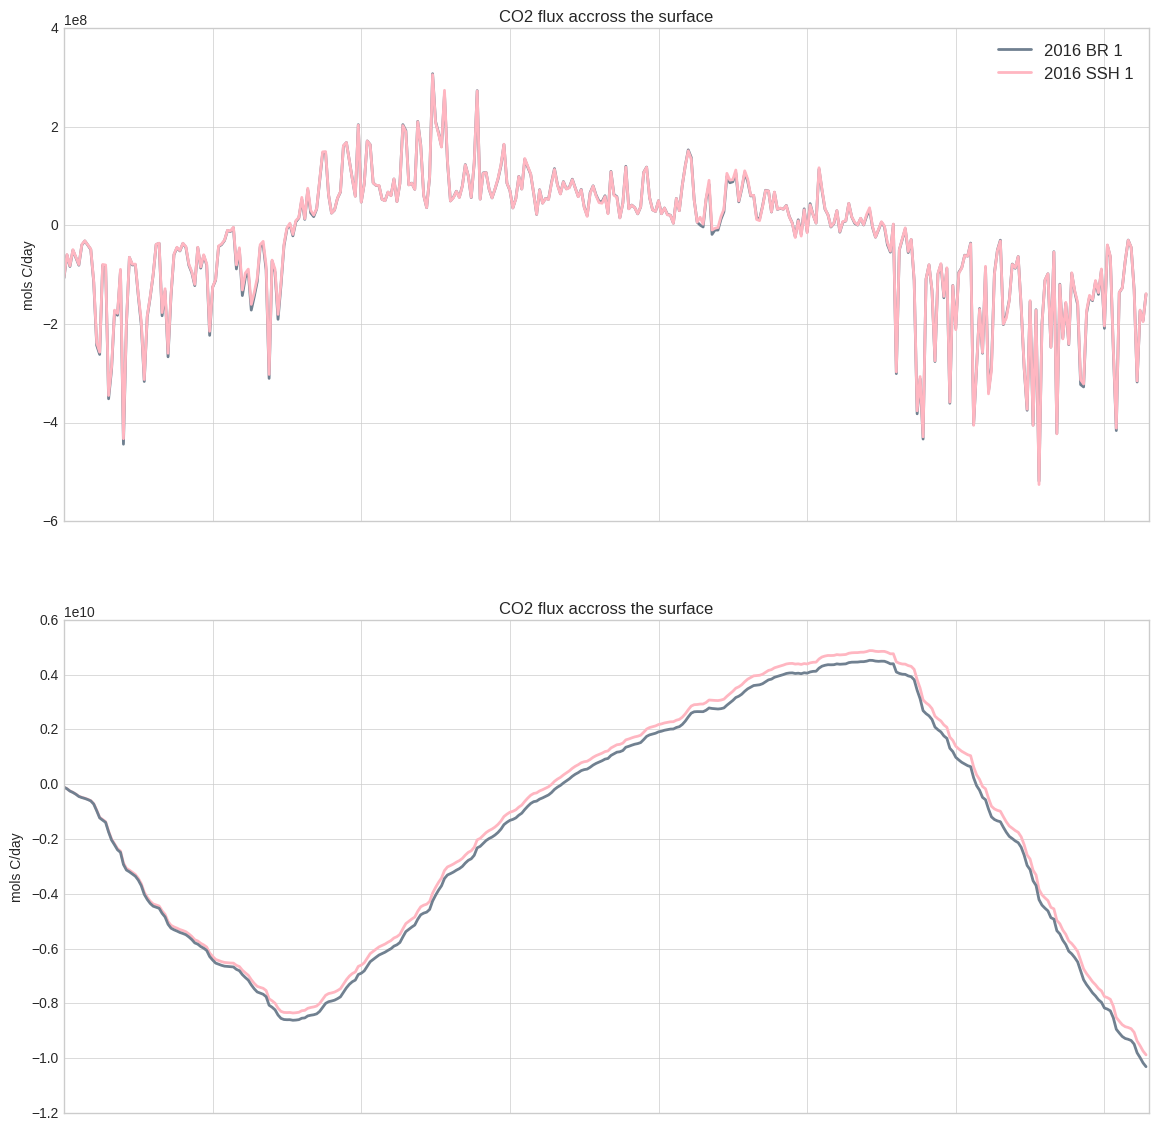

In [70]:
fig = plt.figure(figsize=(10*1.4,10*1.4))

 
ax = fig.add_subplot(2,1,1)

ax.plot(days_in,stor_flx_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,stor_flx_PI_16_1[0:365],color = 'lightpink',label = '2016 SSH 1', linewidth = 2)

plt.xlim([0,365])
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')



ax = fig.add_subplot(2,1,2)
ax.plot(days_in,np.cumsum(stor_flx_PI_16_1[0:365]),color = 'lightpink',label = '2016 PI 1', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_flx_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 1', linewidth = 2)

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

In [71]:
river_load15 = np.float32(1.6911e11)
river_load16 = np.float32(1.6795e11)

#PREINDUSTRIAL MASS BALANCES
EOY_PI2016_1 = np.sum(stor_mol_PI_16_1[np.size(stor_mol_PI_16_1)-1])
PI2016_1_change = (stor_mol_PI_16_1[np.size(stor_mol_PI_16_1)-1]-(stor_mol_PI_16_1[0]))
FLUX_PI2016_1 = np.sum(stor_flx_PI_16_1)
JDFTRANS_PI2016_1 = np.sum(stor_trans_JDF_PI_16_1)

#JSTRANS_PI2015_1 = np.sum(stor_trans_JS_PI_15_1)
JSTRANS_PI2016_1 = -np.sum(stor_trans_JS_PI_16_1)
blackbox_PI_16_1 = (PI2016_1_change - (FLUX_PI2016_1 + JDFTRANS_PI2016_1 + JSTRANS_PI2016_1 + river_load16))

##
EOY_BR2016_1 = np.sum(stor_mol_BR_16_1[np.size(stor_mol_BR_16_1)-1])
BR2016_1_change = (stor_mol_BR_16_1[np.size(stor_mol_BR_16_1)-1]-(stor_mol_BR_16_1[0]))
FLUX_BR2016_1 = np.sum(stor_flx_BR_16_1)
JDFTRANS_BR2016_1 = np.sum(stor_trans_JDF_BR_16_1)

#JSTRANS_BR2015_1 = np.sum(stor_trans_JS_BR_15_1)
JSTRANS_BR2016_1 = -np.sum(stor_trans_JS_BR_16_1)
blackbox_BR_16_1 = (BR2016_1_change - (FLUX_BR2016_1 + JDFTRANS_BR2016_1 + JSTRANS_BR2016_1 + river_load16))

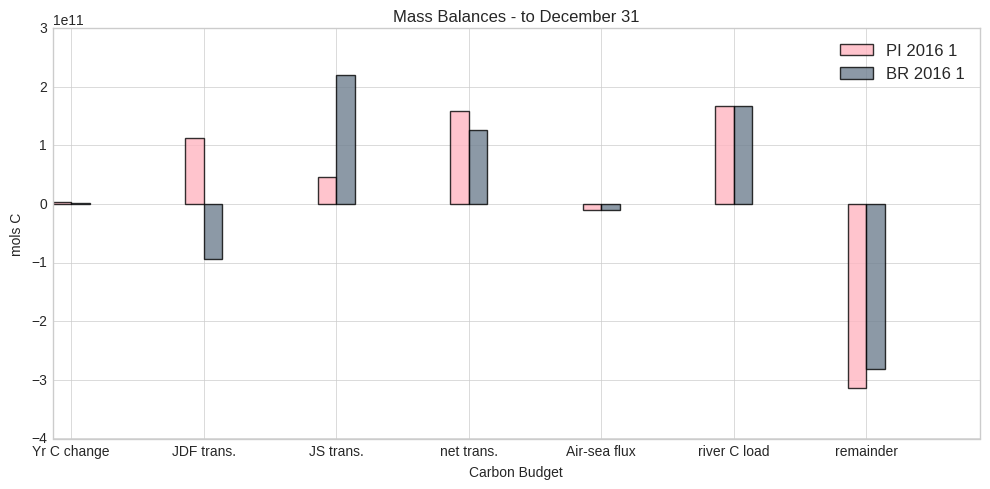

In [74]:
# data to plot
n_groups = 7
PI16_1_stats = (PI2016_1_change, JDFTRANS_PI2016_1, JSTRANS_PI2016_1, JSTRANS_PI2016_1 + JDFTRANS_PI2016_1,  FLUX_PI2016_1, river_load16, blackbox_PI_16_1)
BR16_1_stats = (BR2016_1_change, JDFTRANS_BR2016_1, JSTRANS_BR2016_1, JSTRANS_BR2016_1 + JDFTRANS_BR2016_1,  FLUX_BR2016_1, river_load16, blackbox_BR_16_1)

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.14
opacity = 0.8



rects4 = plt.bar(index , PI16_1_stats, bar_width,
alpha=opacity,
color='lightpink',
label='PI 2016 1')


rects6 = plt.bar(index + bar_width*1, BR16_1_stats, bar_width,
alpha=opacity,
color='slategrey',
label='BR 2016 1')



plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to December 31')
plt.xticks(index + bar_width, ('Yr C change', 'JDF trans.', 'JS trans.', 'net trans.', 'Air-sea flux', 'river C load', 'remainder'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()